# IT Academy - Data Science with Python
## S16 T01: Advanced Machine Learning (In process)
### [Github Advanced Machine Learning](https://github.com/jesussantana/Advanced-Machine-Learning)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Advanced-Machine-Learning.svg)](https://wakatime.com/badge/github/jesussantana/Advanced-Machine-Learning)

## Auto Import Python Libraries

https://pypi.org/project/pyforest/

In [1]:
from sklearn.model_selection import GridSearchCV
import sys
import numpy as np
from sklearn.ensemble import RandomForestRegressor
# ^^^ pyforest auto-imports - don't write above this line
# ==============================================================================
# Auto Import Dependencies
# ==============================================================================
# pyforest imports dependencies according to use in the notebook
# ==============================================================================

import pyforest

In [2]:
# Dependencies not Included in Auto Import*
# ==============================================================================

# Data wrangling
# ==============================================================================
import missingno as msno 

# Preprocessing and modeling
# ==============================================================================
from sklearn.preprocessing import OrdinalEncoder

# Metrics
# ==============================================================================
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, euclidean_distances, accuracy_score

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Others Plots
# ==============================================================================


# Matplotlib configuration
# ==============================================================================
import matplotlib.ticker as ticker
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Level 1

- Exercise 1: 
  - Take the data set you want and do a pipeline and a gridsearch using the Random Forest algorithm.



In [3]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/forestfires.csv'

df_raw = pd.read_csv(path+file)

<IPython.core.display.Javascript object>

# Data Description
## Foret Fires csv

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

## Exploratory analysis


In [4]:
df = df_raw.copy()

In [5]:
df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
df.shape

(517, 13)

In [8]:
df.isna().sum().sort_values()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [10]:
df.isna().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

## Distribution of the response variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

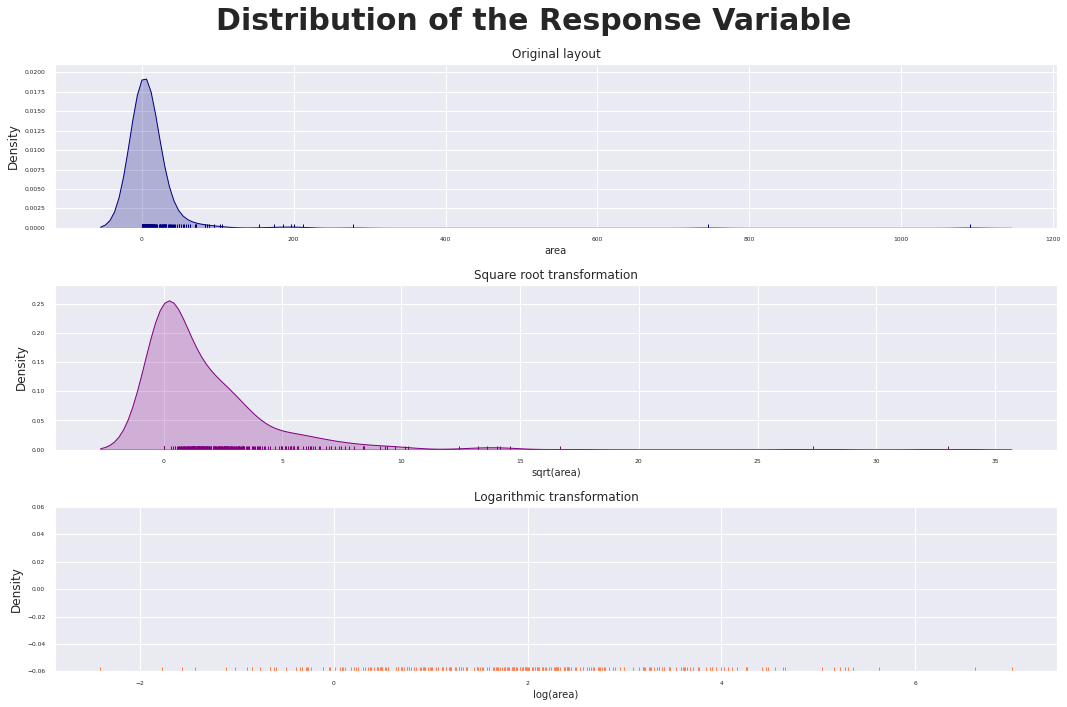

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.area,
    hist    = False,
    rug     = True,
    color   = "navy",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('area', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.area),
    hist    = False,
    rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(area)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.area),
    hist    = False,
    rug     = True,
    color   = "coral",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(area)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.suptitle('Distribution of the Response Variable', fontsize = 30, fontweight = "bold")
fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Response_Variable.png")

## Numerical variables

In [12]:
df.select_dtypes(include=['float64', 'int']).describe().round(3)

X       Y     FFMC      DMC       DC      ISI     temp       RH  \
count  517.000  517.00  517.000  517.000  517.000  517.000  517.000  517.000   
mean     4.669    4.30   90.645  110.872  547.940    9.022   18.889   44.288   
std      2.314    1.23    5.520   64.046  248.066    4.559    5.807   16.317   
min      1.000    2.00   18.700    1.100    7.900    0.000    2.200   15.000   
25%      3.000    4.00   90.200   68.600  437.700    6.500   15.500   33.000   
50%      4.000    4.00   91.600  108.300  664.200    8.400   19.300   42.000   
75%      7.000    5.00   92.900  142.400  713.900   10.800   22.800   53.000   
max      9.000    9.00   96.200  291.300  860.600   56.100   33.300  100.000   

          wind     rain      area  
count  517.000  517.000   517.000  
mean     4.018    0.022    12.847  
std      1.792    0.296    63.656  
min      0.400    0.000     0.000  
25%      2.700    0.000     0.000  
50%      4.000    0.000     0.520  
75%      4.900    0.000     6.570  
max      9.400    6.400  1090.840

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

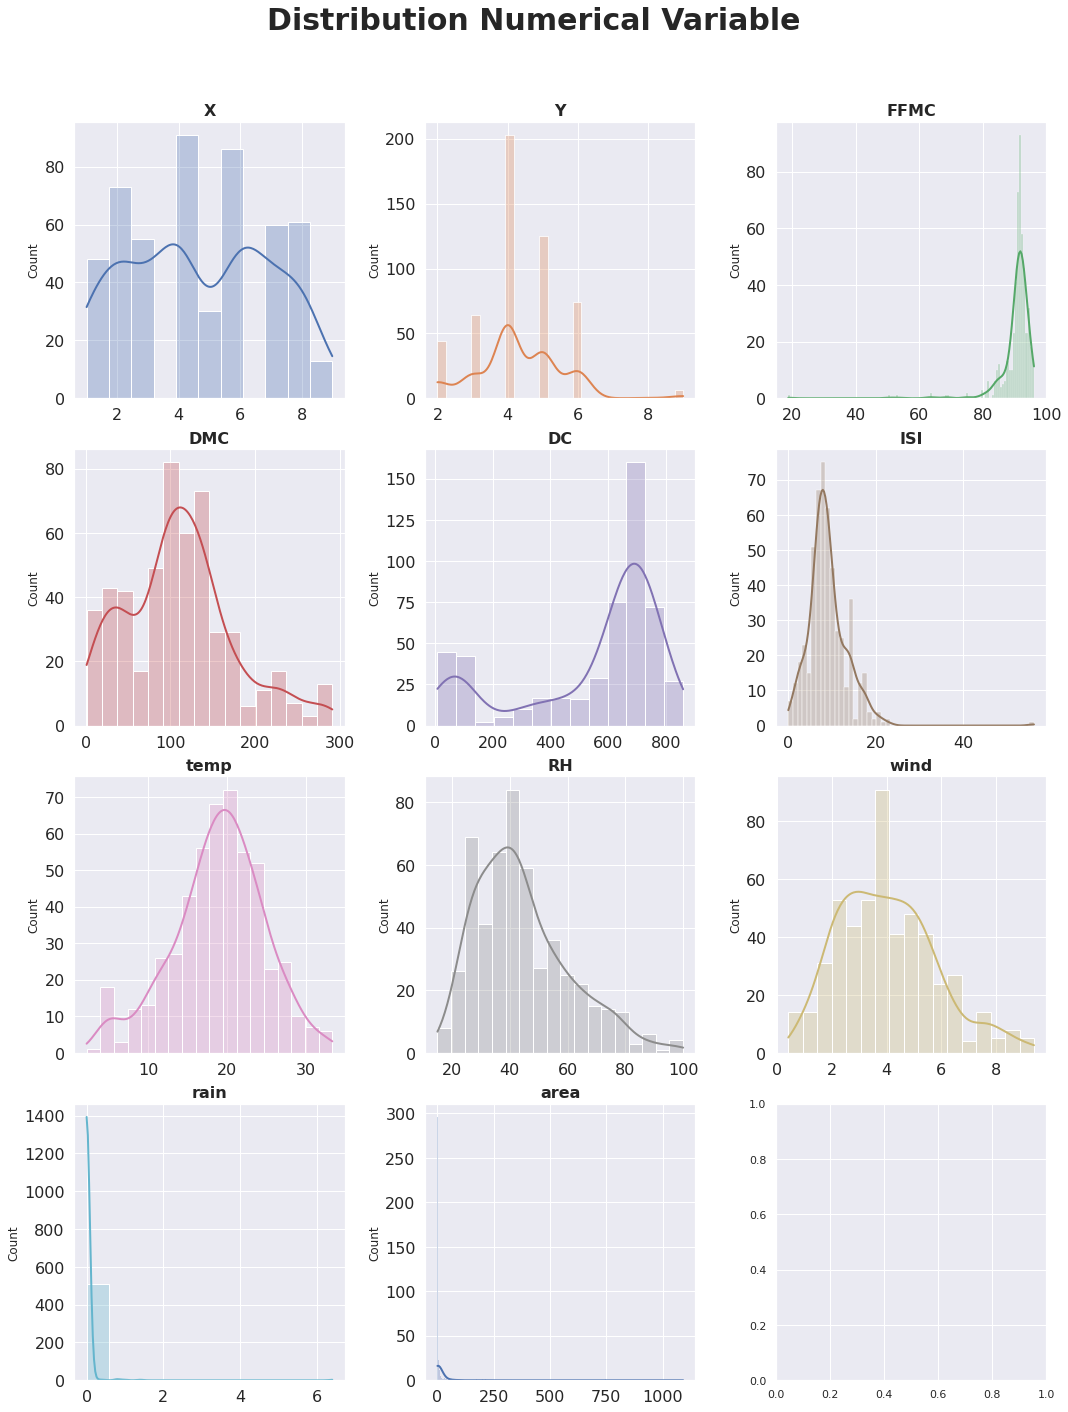

In [13]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15, 20))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

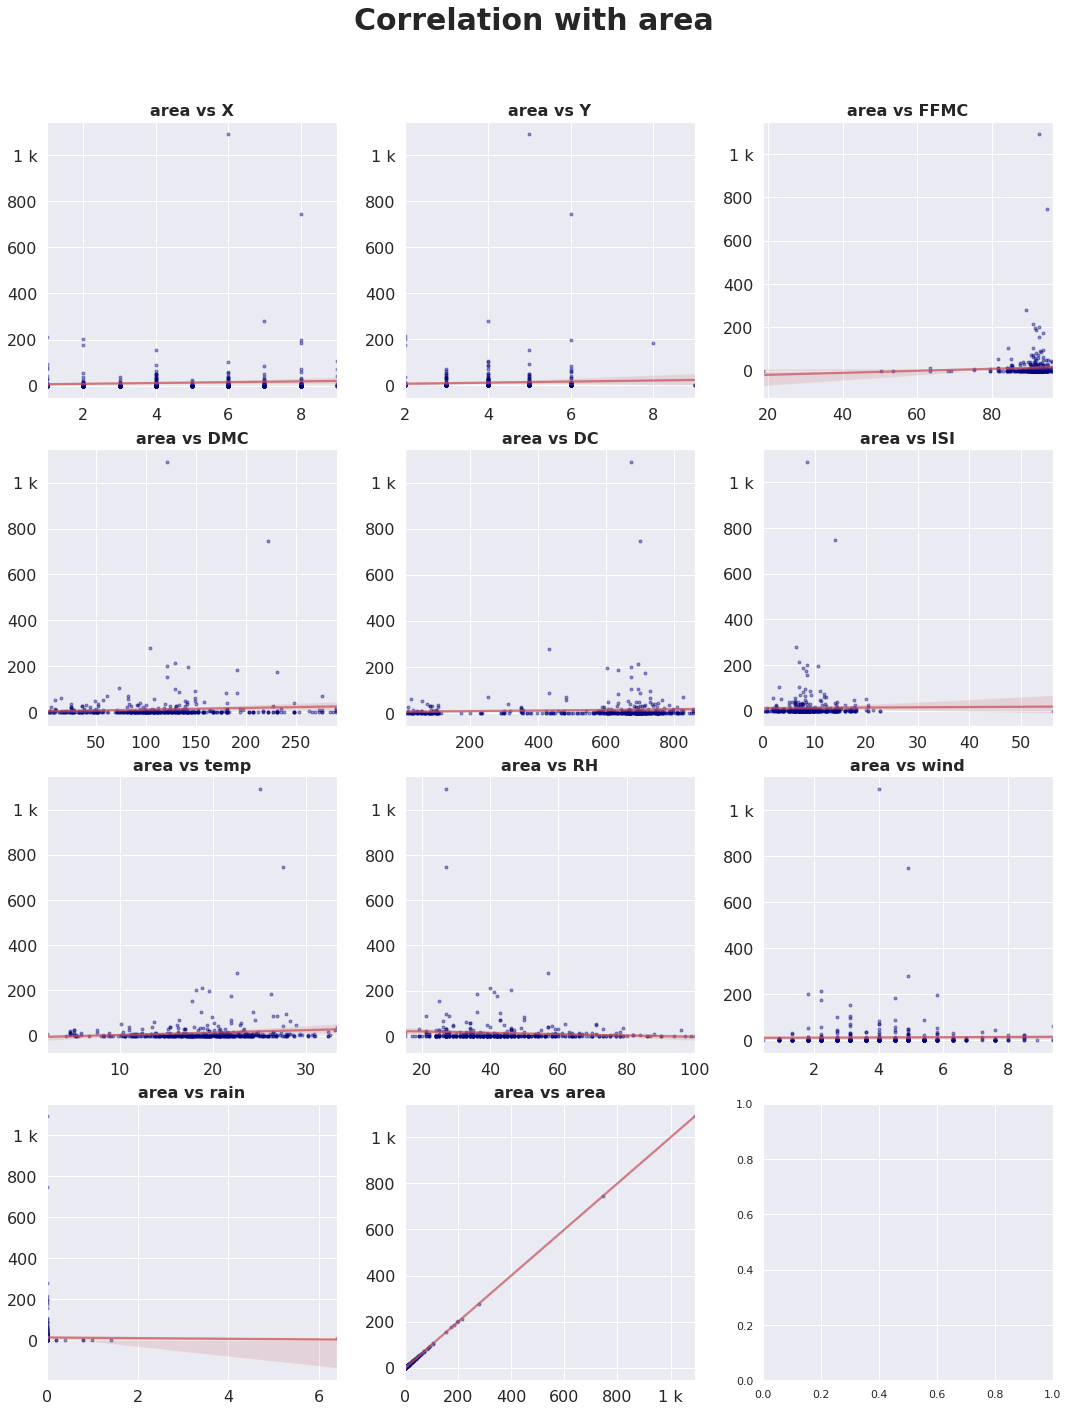

In [14]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15, 20))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
#columnas_numeric = columnas_numeric.drop('area')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['area'],
        color       = "navy",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"area vs {colum}", fontsize = 16, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Se eliminan los axes vacíos
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with area', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png");

In [15]:

# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

variable_1 variable_2         r     abs_r
47         DC        DMC  0.682192  0.682192
37        DMC         DC  0.682192  0.682192
1           X          Y  0.539548  0.539548
11          Y          X  0.539548  0.539548
27       FFMC        ISI  0.531805  0.531805
57        ISI       FFMC  0.531805  0.531805
83         RH       temp -0.527390  0.527390
73       temp         RH -0.527390  0.527390
70       temp         DC  0.496208  0.496208
50         DC       temp  0.496208  0.496208

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

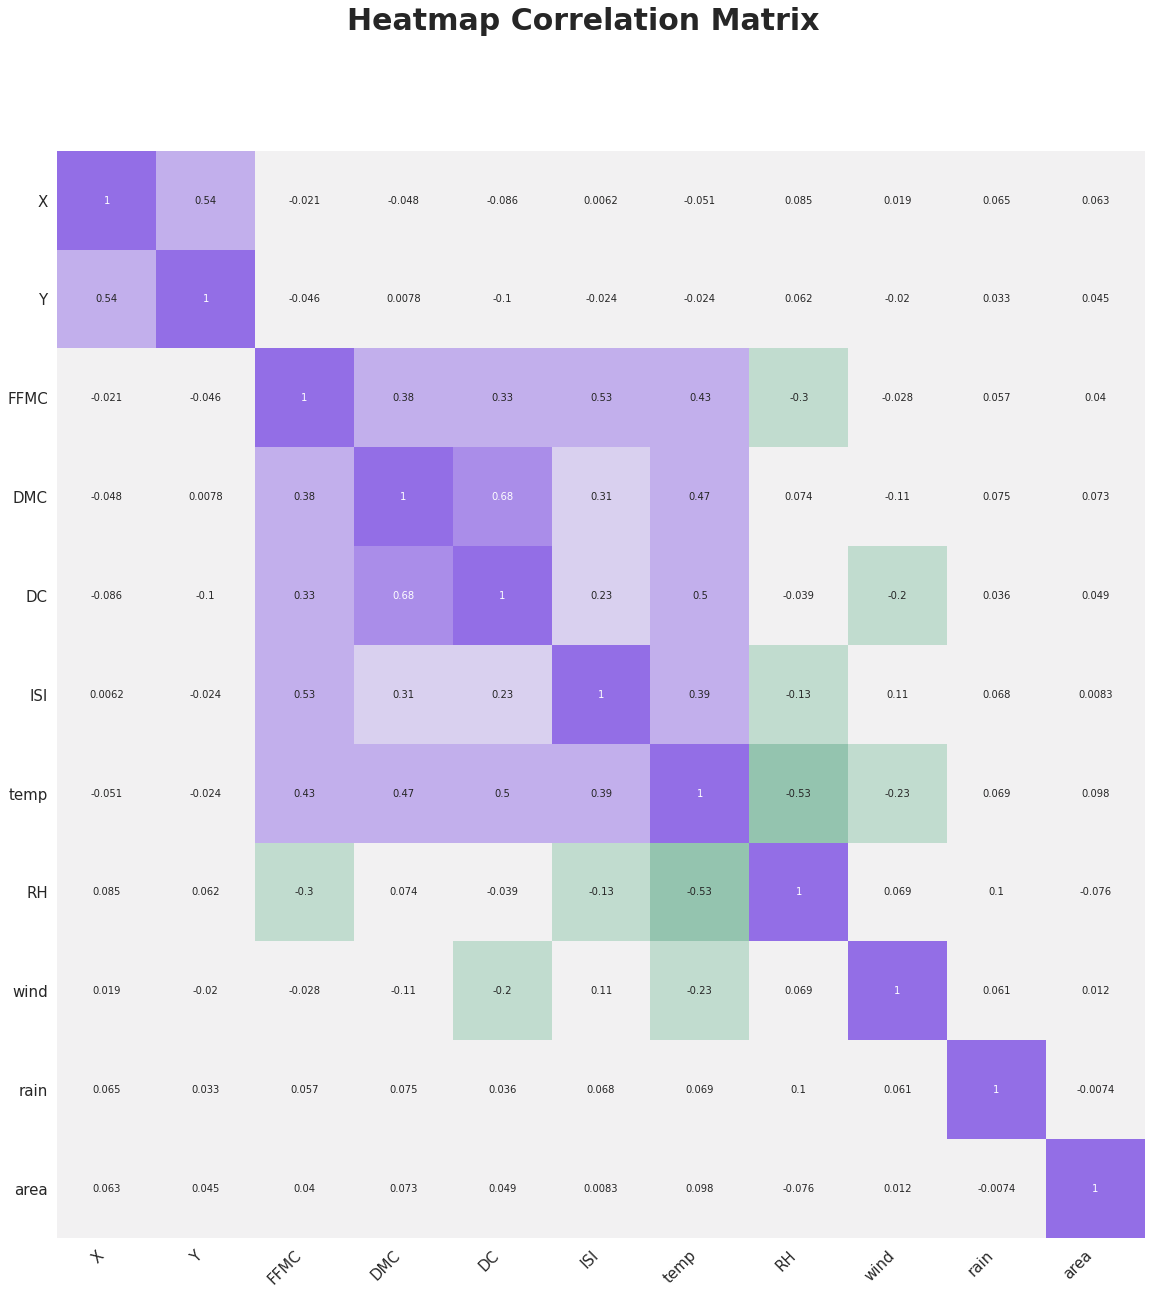

In [16]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)
fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png");

In [17]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

month  day
count    517  517
unique    12    7
top      aug  sun
freq     184   95

## Qualitative variables

### Graph Pie chart's for each qualitative variables

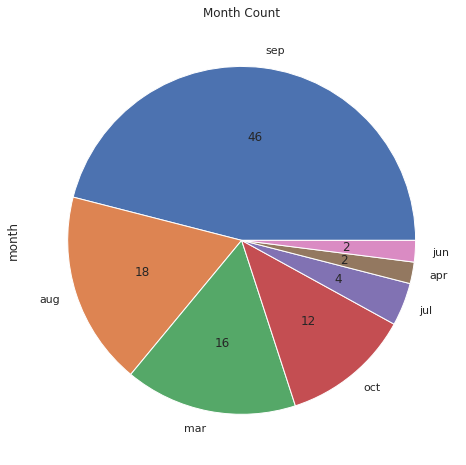

In [18]:
# Pie chart de Months
plot = df['month'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(8, 8),
                                            title='Month Count')

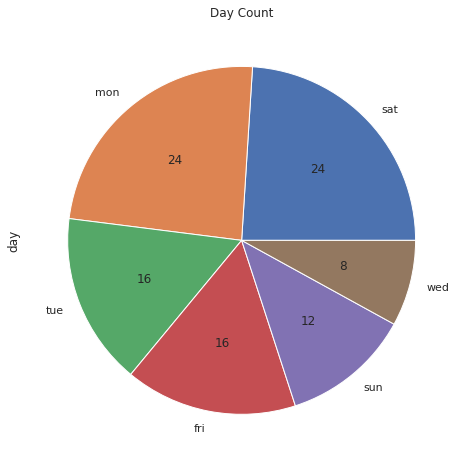

In [19]:
# Pie chart de Months
plot = df['day'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(8, 8),
                                            title='Day Count')

In [20]:
df.drop_duplicates(inplace=True)

## Transform Categorical Variables

In [21]:
# Ordinal encoding 
encoder = OrdinalEncoder()

df[['month', 'day']]= encoder.fit_transform(df[['month', 'day']])

In [22]:
df.to_csv(path + "processed/forestfiresProcessed.csv", index = False, header = True)

******************************
******************************
******************************
******************************

## Divide the data set into training set and test set

In [23]:
df = pd.read_csv(path + 'processed/forestfiresProcessed.csv')

<IPython.core.display.Javascript object>

In [24]:
# Matrix
X = df.drop(['area'], axis = 'columns')
# Vector
y = df['area']

In [25]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6858)

<IPython.core.display.Javascript object>

## Checking if the training set was correcly splitted

In [26]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (410, 12) Target:  (410,)
Test set - Features:  (103, 12) Target:  (103,)


## Checking  Train, Test partition

In [27]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count     410.000000
mean       13.551463
std        70.299104
min         0.000000
25%         0.000000
50%         0.545000
75%         6.570000
max      1090.840000
Name: area, dtype: float64


In [28]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count    103.000000
mean      10.264951
std       25.813430
min        0.000000
25%        0.000000
50%        0.520000
75%        6.465000
max      200.940000
Name: area, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

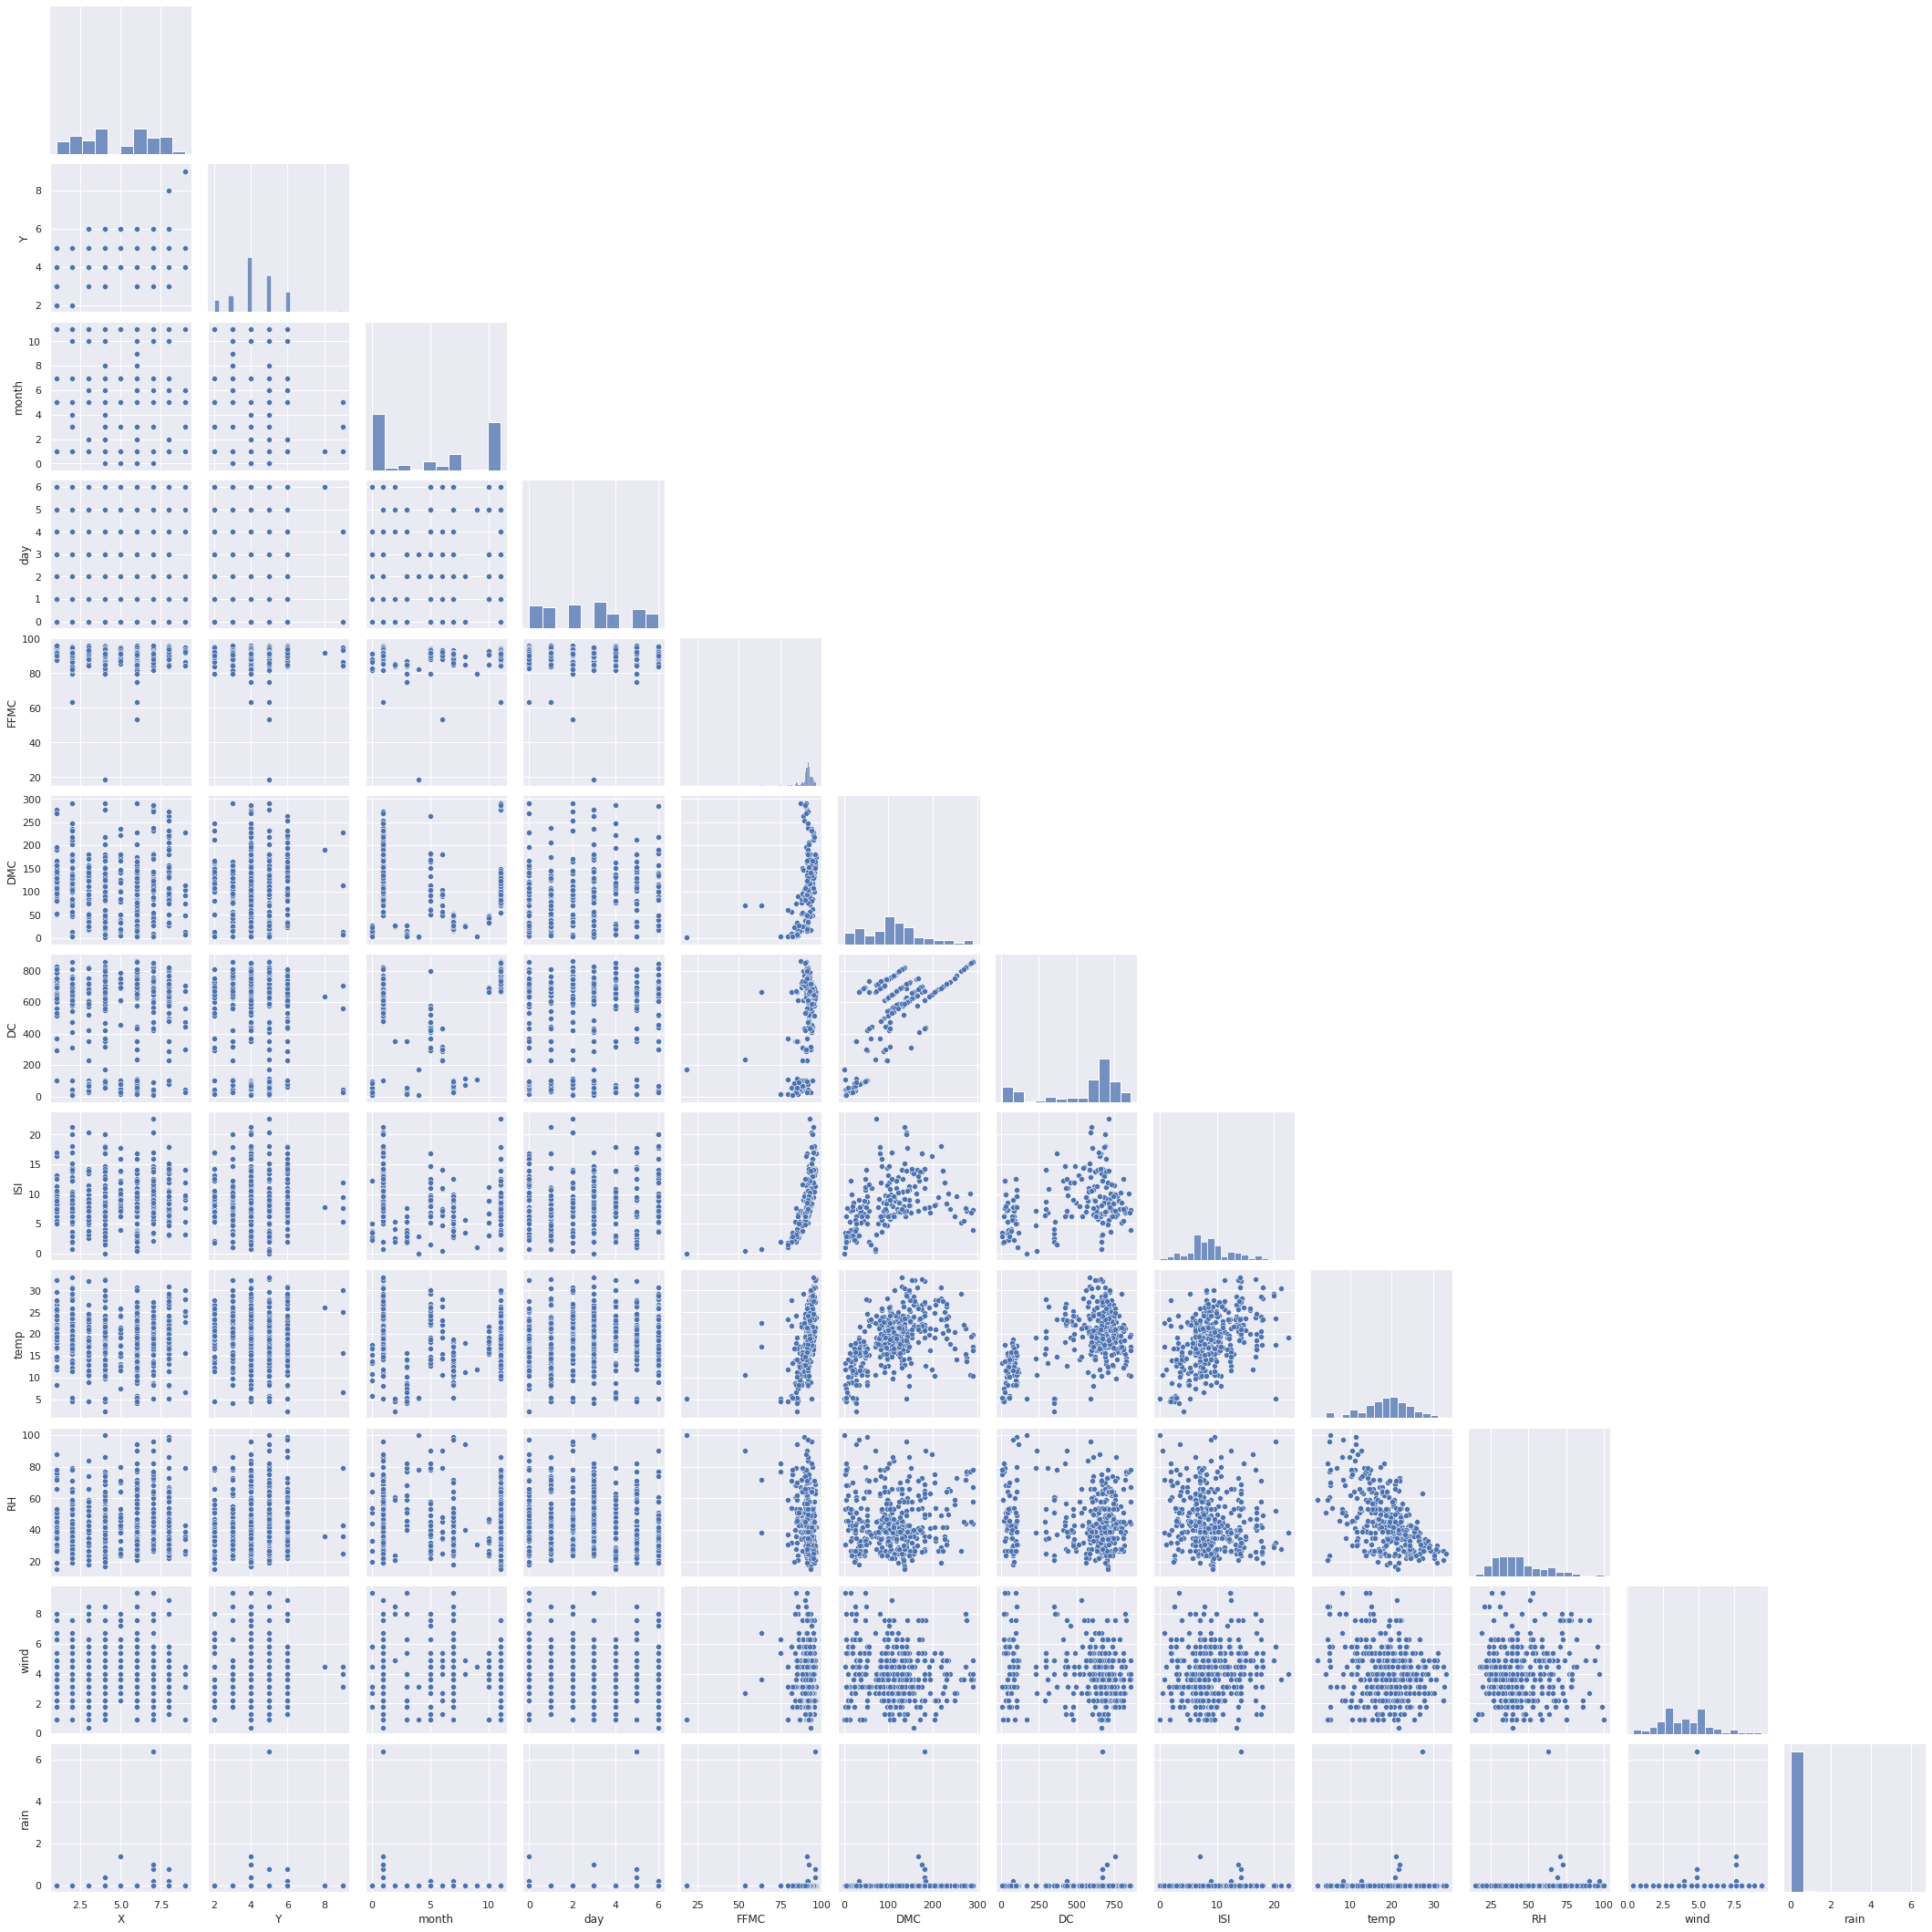

In [29]:
sns.pairplot(X_train.round(3), corner=True)
plt.savefig("../reports/figures/train_pairplot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

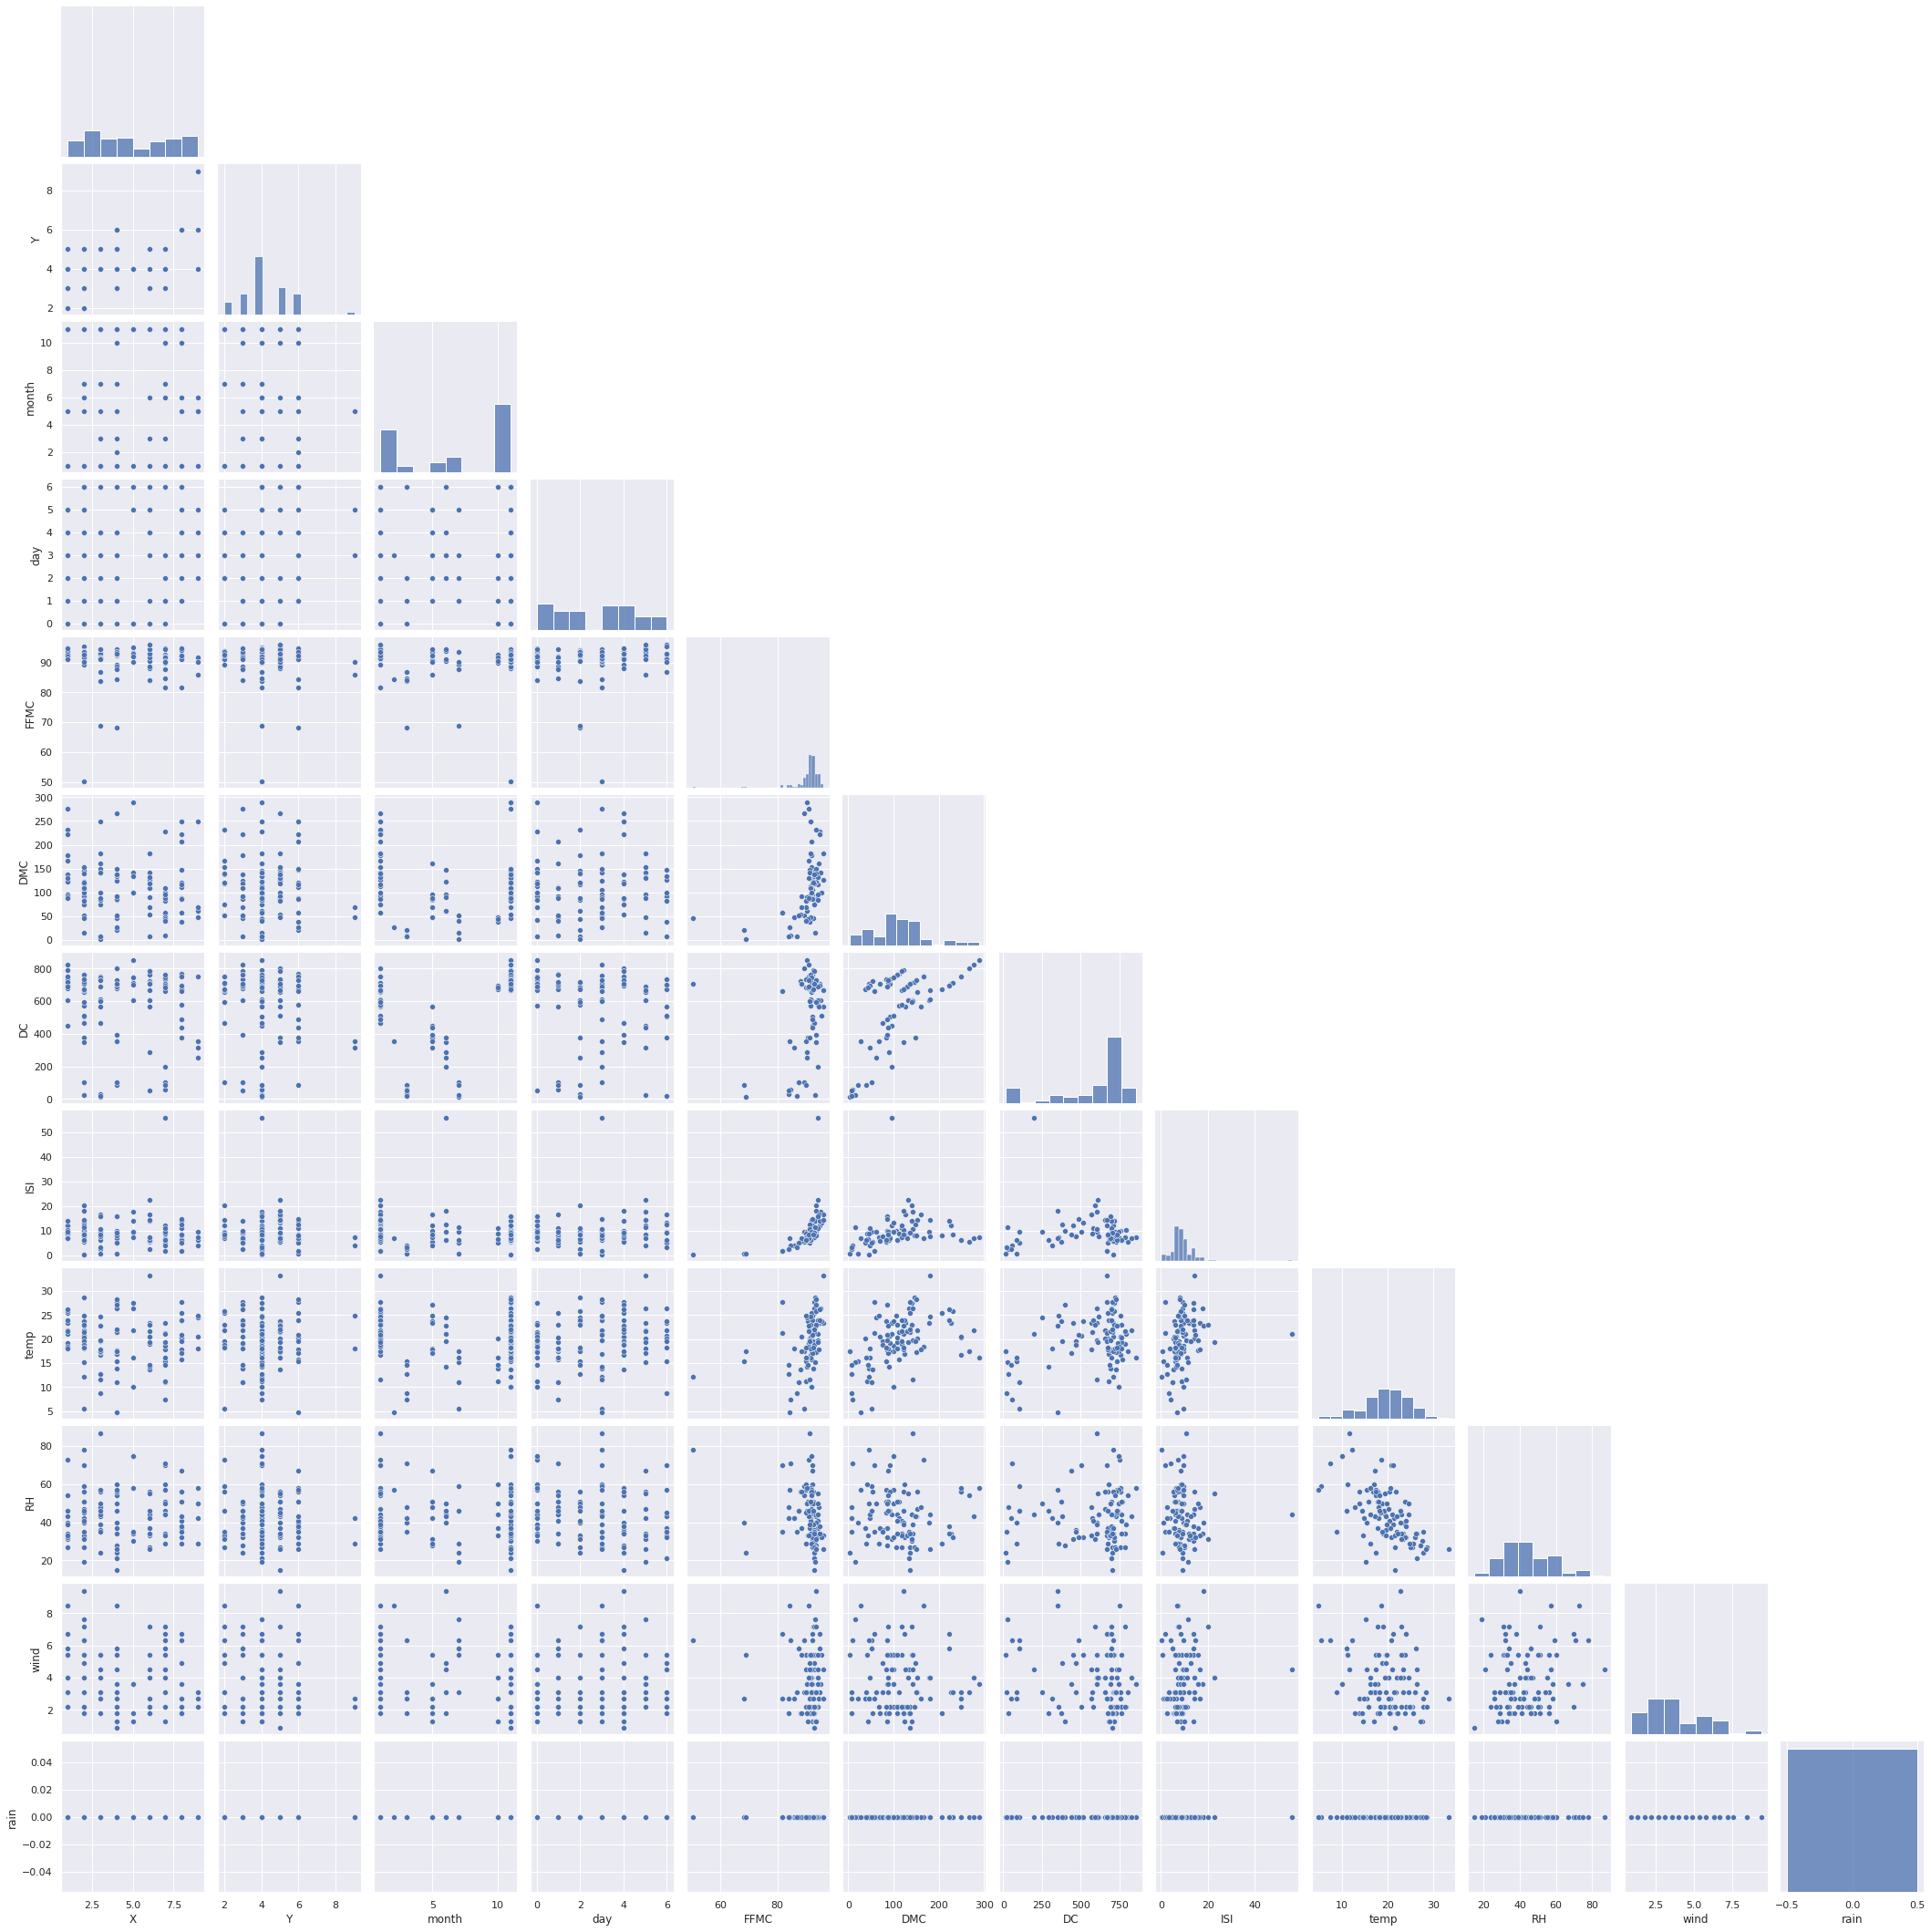

In [30]:
sns.pairplot(X_test.round(3), corner=True)
plt.savefig("../reports/figures/test_pairplot.png")

In [31]:
X_train.to_csv(path + "interim/X_train.csv", index = False, header = True)
X_test.to_csv(path + "interim/X_test.csv", index = False, header = True)

## Checking Score

In [32]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return str(r_squared), str(rmse)

In [33]:
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Area vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Area',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.savefig("../reports/figures/%s.png" % model_name)
    plt.show()

In [34]:
# Instantiating model
rf_reg=RandomForestRegressor()

# Hyper-parameters tunning-grid
rf_grid={'n_estimators':[100,125,150],
         'max_features':[None],
         'min_samples_leaf':[10,20,30],
         'max_depth':[None,10,15],
          }

# Grid Search CV
rf_GSCV=GridSearchCV(estimator=rf_reg,
                     param_grid=rf_grid,
                     verbose=2,
                     cv=10,
                     n_jobs=-2,
                     scoring='neg_root_mean_squared_error')

In [35]:
# Fit The Model
rf_GSCV.fit(X,y)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed:   15.5s finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
             param_grid={'max_depth': [None, 10, 15], 'max_features': [None],
                         'min_samples_leaf': [10, 20, 30],
                         'n_estimators': [100, 125, 150]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [36]:
# Best Score
rf_GSCV.best_score_

-42.72486196593368

In [37]:
# Best Estimator
rf_GSCV.best_estimator_

RandomForestRegressor(max_features=None, min_samples_leaf=30)

In [38]:
# Histogram-based Gradient Boosting Regression Tree
hist = RandomForestRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [39]:
r2_RandomForest, rmse_RandomForest = rmse(hist, y_test, y_pred, X_train, y_train)

In [40]:
print(r'R-Squared: ',r2_RandomForest)
print(r'Mean Squared Error: ',rmse_RandomForest)

R-Squared:  -1.5148145303747205
Mean Squared Error:  40.73616831058459


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

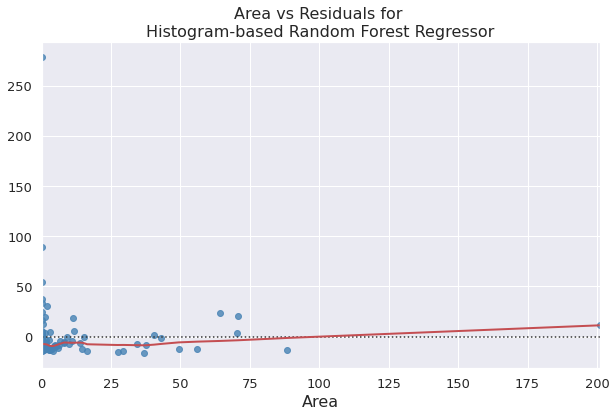

In [41]:
scatter_plot(y_test, y_pred, 'Histogram-based Random Forest Regressor')

In [42]:
# Saving model
dump(rf_GSCV.best_estimator_,'../data/interim/rf_GSCV.joblib')

['../data/interim/rf_GSCV.joblib']

******************************
******************************

- Exercise 2: 
  - Take a text in English that you want, and calculate the frequency of the words